<a href="https://colab.research.google.com/github/Prashanth1234545/CODSOFT/blob/main/CODSOFT_TASK_2_MOVIE_RATING_PREDICTION_WITH_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Loading and Exploration**

In [4]:
import pandas as pd

df = pd.read_csv('/content/sample_data/IMDb Movies India.csv', encoding='latin-1')

print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB
None
                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Ro

**Data Preprocessing**

In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

df['Rating'].fillna(df['Rating'].median(), inplace=True)
df['Genre'].fillna('Unknown', inplace=True)
df['Director'].fillna('Unknown', inplace=True)
df['Actor 1'].fillna('Unknown', inplace=True)
df['Actor 2'].fillna('Unknown', inplace=True)
df['Actor 3'].fillna('Unknown', inplace=True)

label_encoders = {}
for column in ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

X = df[['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']]
y = df['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Model Training**

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))


Mean Squared Error: 0.9156781407751752
R^2 Score: 0.05834125632831044


**Feature Importance**

In [11]:
importances = model.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
print(feature_importance_df.sort_values(by='Importance', ascending=False))


    Feature  Importance
1  Director    0.218235
4   Actor 3    0.210590
2   Actor 1    0.209199
3   Actor 2    0.199893
0     Genre    0.162083


**Make Predictions on New Data**

In [17]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

new_data = pd.read_csv('/content/sample_data/IMDb Movies India.csv', encoding='latin-1')

label_encoders = {}

for column in ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']:
    new_data[column].fillna('Unknown', inplace=True)

    if column not in label_encoders:
        label_encoders[column] = LabelEncoder()

    new_data[column] = label_encoders[column].fit_transform(new_data[column])

X_new = new_data[['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']]
predictions = model.predict(X_new)

new_data['predicted_rating'] = predictions
new_data.to_csv('predicted_ratings.csv', index=False)

**Visualize Results**

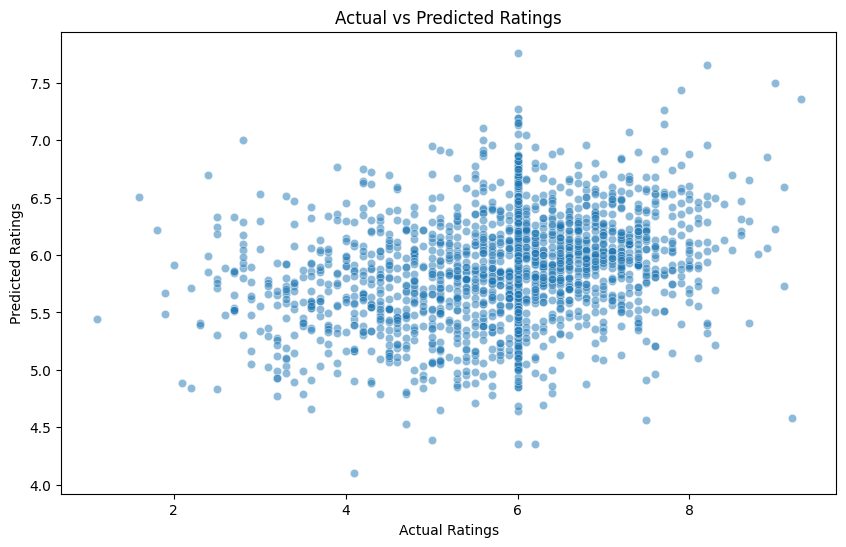

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings')
plt.show()


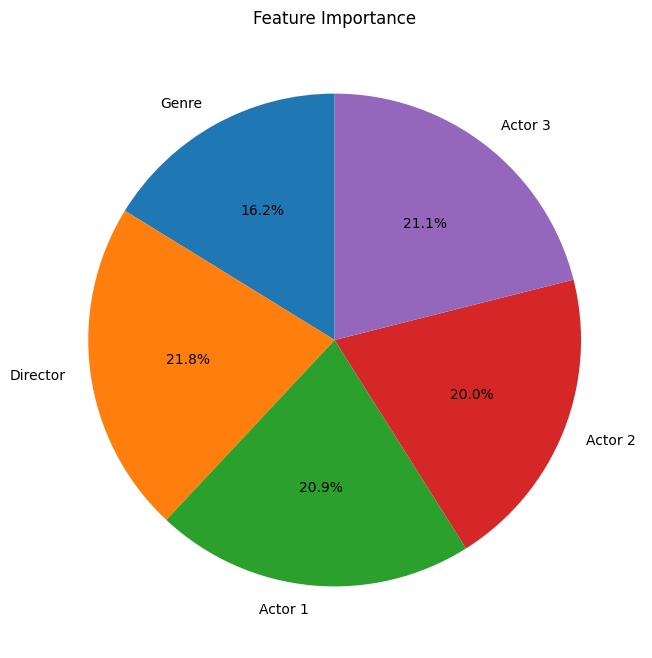

In [19]:
feature_importance_df['Importance'] = feature_importance_df['Importance'] * 100

plt.figure(figsize=(8, 8))
plt.pie(feature_importance_df['Importance'], labels=feature_importance_df['Feature'], autopct='%1.1f%%', startangle=90)
plt.title('Feature Importance')
plt.show()
